## Problem Statement

##### Car prices prediction with respect to given specifications of the car

## Introduction
###       1. Dataset Attributes info

### 2. Dataset clean-up

#### Reading and understanding the data

In [1]:
## Importing required libraries
import numpy as np
import pandas as pd
import os

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV

# to build the models
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# to evaluate the models
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn import metrics

#To impute missing values
from sklearn.impute import SimpleImputer


In [2]:
cols = ['symboling', 'normalized-losses', 'company', 'fuel-type', 'aspiration', 'num-doors',
        'body-style', 'drive-wheels', 'engine-location', 'wheel-base',
        'length', 'width', 'height', 'weight', 'engine-type', 'num-cylinders',
        'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
        'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
data = pd.read_csv('https://storage.googleapis.com/ml_universities/cars_dataset/cars_data.csv',names=cols,
                        sep=',', na_values='?',header=None, encoding='latin-1')

 #### Data Inspection

In [3]:
data.head(10)

,symboling,normalized-losses,company,fuel-type,aspiration,num-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   company            205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-doors          203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  weight             205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-cylinders      205 non-null    object 
 16  engine-size        205 non

In [5]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


###### As symboling denotes rating it's data type should be categorical
-- Coverting the data type of symboling

In [6]:
data['symboling'] = data['symboling'].astype('O')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    object 
 1   normalized-losses  164 non-null    float64
 2   company            205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-doors          203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  weight             205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-cylinders      205 non-null    object 
 16  engine-size        205 non

In [8]:
print("All attributes with no. of missing value in data : ")
null_values = pd.DataFrame({'total_missing': data.isnull().sum(), '%_missing': data.isnull().mean()*100,
                           'datatype':data.dtypes})
null_values[null_values['total_missing']>0].sort_values('total_missing',ascending=False)

All attributes with no. of missing value in data : 


,total_missing,%_missing,datatype
normalized-losses,41,20.00000,float64
bore,4,1.95122,float64
stroke,4,1.95122,float64
price,4,1.95122,float64
num-doors,2,0.97561,object
horsepower,2,0.97561,float64
peak-rpm,2,0.97561,float64


###### As price  attribute is our target column we need to remove all the rows with null values w.r.t price column

In [9]:
data.dropna(subset=['price'],axis=0,inplace=True)

In [10]:
print("All attributes with no. of missing value in data : ")
null_values = pd.DataFrame({'total_missing': data.isnull().sum(), '%_missing': data.isnull().mean()*100,
                           'datatype':data.dtypes})
null_values[null_values['total_missing']>0].sort_values('total_missing',ascending=False)

All attributes with no. of missing value in data : 


,total_missing,%_missing,datatype
normalized-losses,37,18.407960,float64
bore,4,1.990050,float64
stroke,4,1.990050,float64
num-doors,2,0.995025,object
horsepower,2,0.995025,float64
peak-rpm,2,0.995025,float64


In [11]:
data.columns

Index(['symboling', 'normalized-losses', 'company', 'fuel-type', 'aspiration',
       'num-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'weight', 'engine-type',
       'num-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

### Exploratory Data Analysis
##### (i) 	Univariate analysis 

##### Price is our target variable

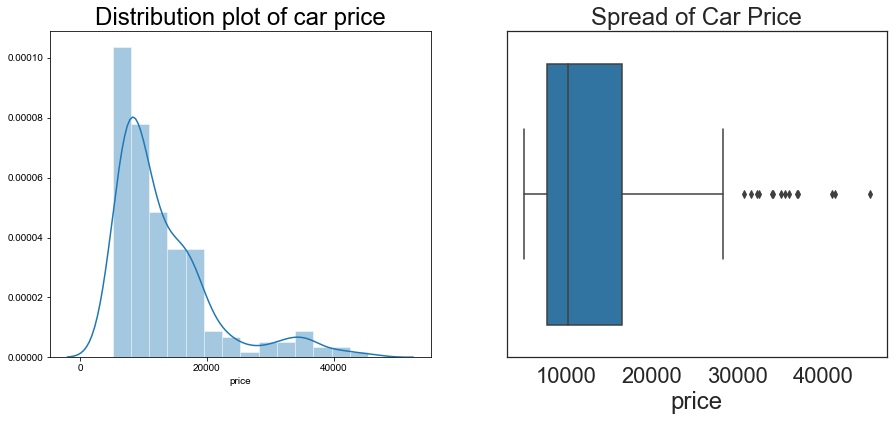

In [12]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.set_style("white")
sns.set_context("notebook",font_scale=2)
ax = sns.distplot(data['price'])
ax.set_title("Distribution plot of car price");

plt.subplot(1,2,2)
ax1 = sns.boxplot(data.price)
ax1.set_title("Spread of Car Price");

In [13]:
data['price'].describe(percentiles=[0.25,0.5,0.75,.85,.90,1])

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
85%      18420.000000
90%      22470.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

### Observations :
    1. Car price distribution is completly right skewed and most of the prices are below 16,500 , indicates more people tend to by mid-range cars of price arount the mean i.e; 16,500.
    2. Most of the data points are far away from mean, which indicates a high variance in prices.

### Exploring categorical Data

<Figure size 1440x432 with 0 Axes>

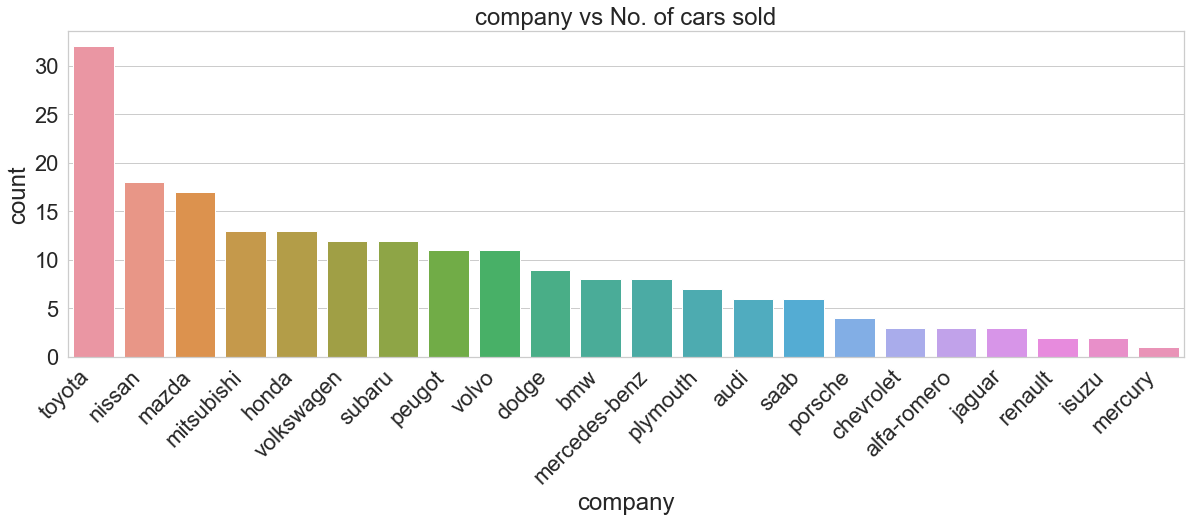

In [14]:
plt.figure(figsize = (20,6))
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=2)

fig, ax = plt.subplots(figsize=(20,6))
ax = sns.countplot(x="company", data=data,order = data['company'].value_counts().index)
ax.set_title("company vs No. of cars sold");
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

### Observations :
    1. Toyota company is having the most number of sales

Average Price : 13207.129353233831 Dollars


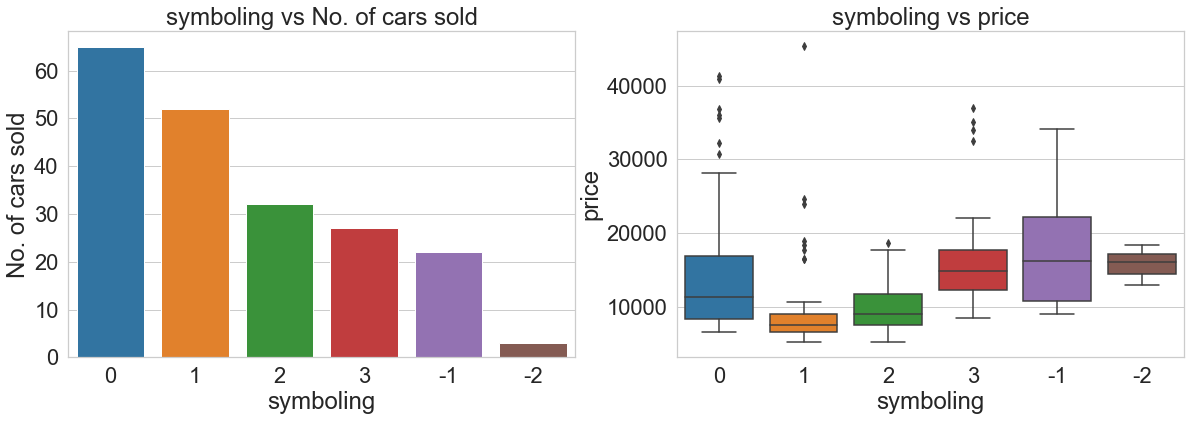

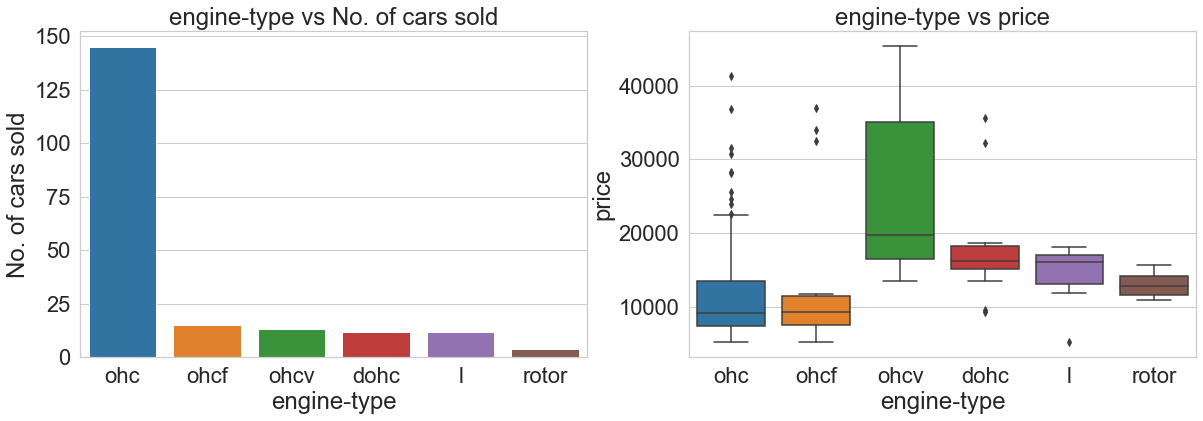

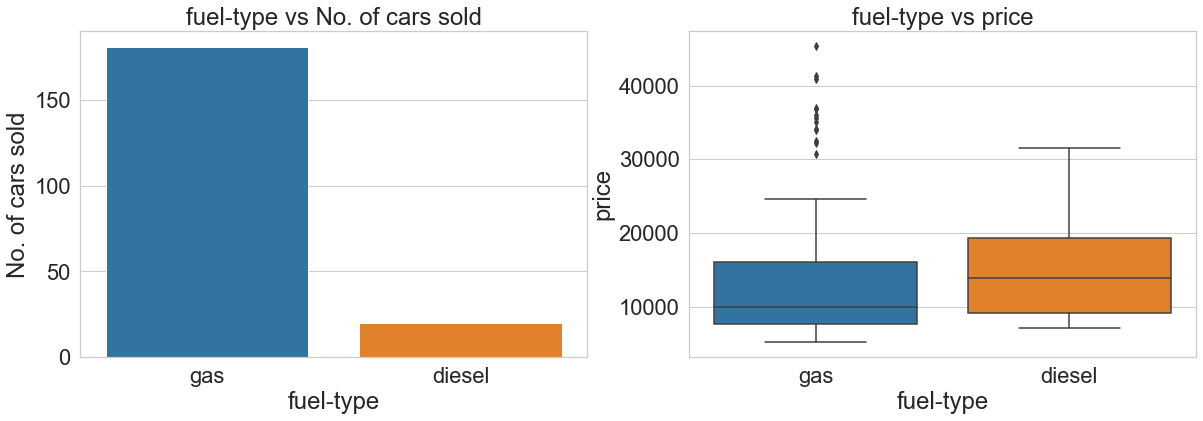

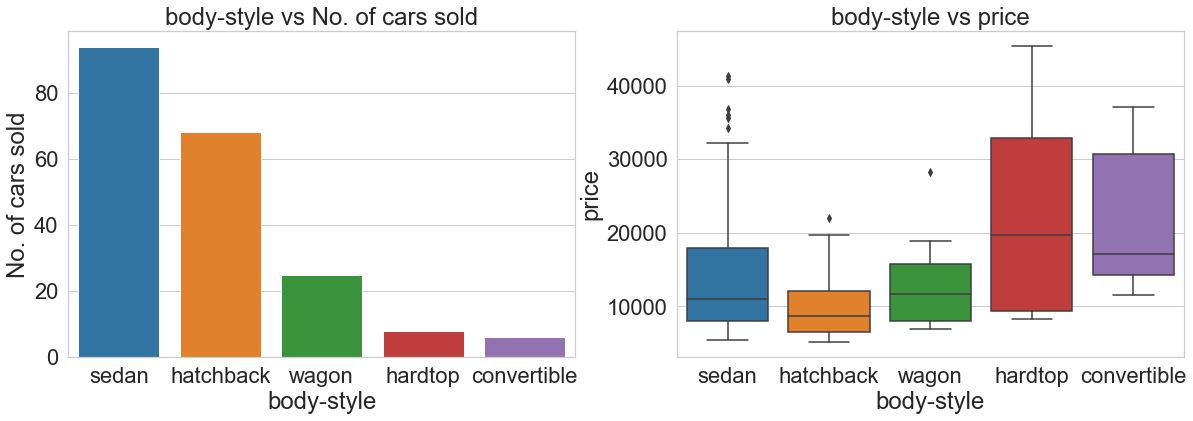

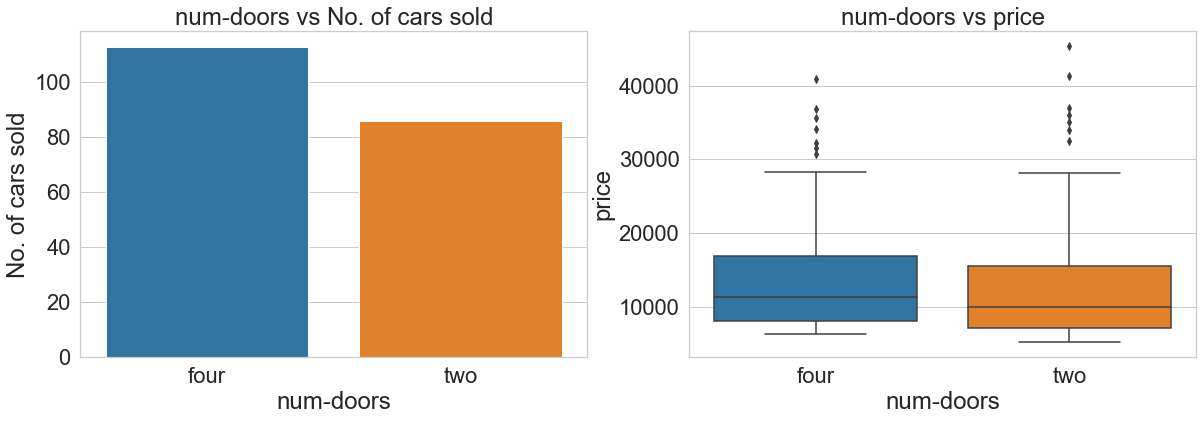

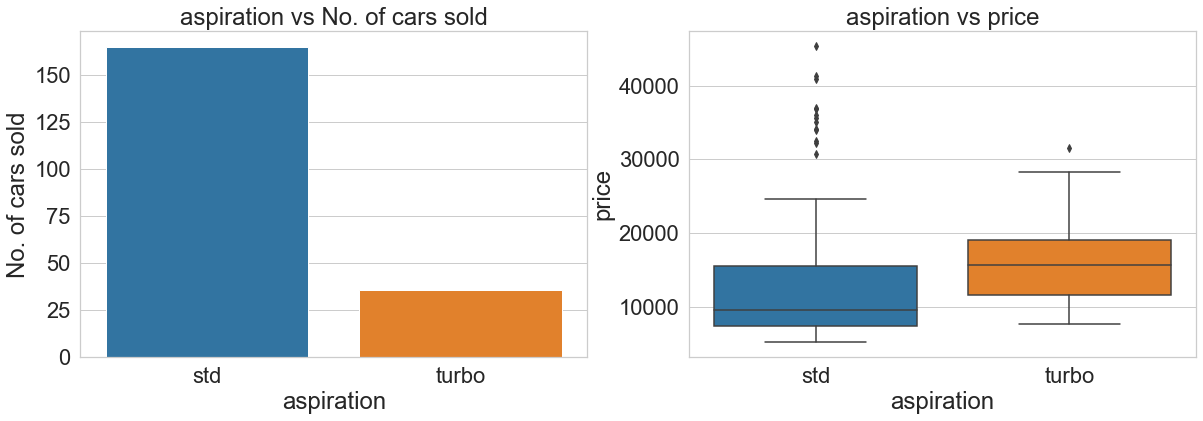

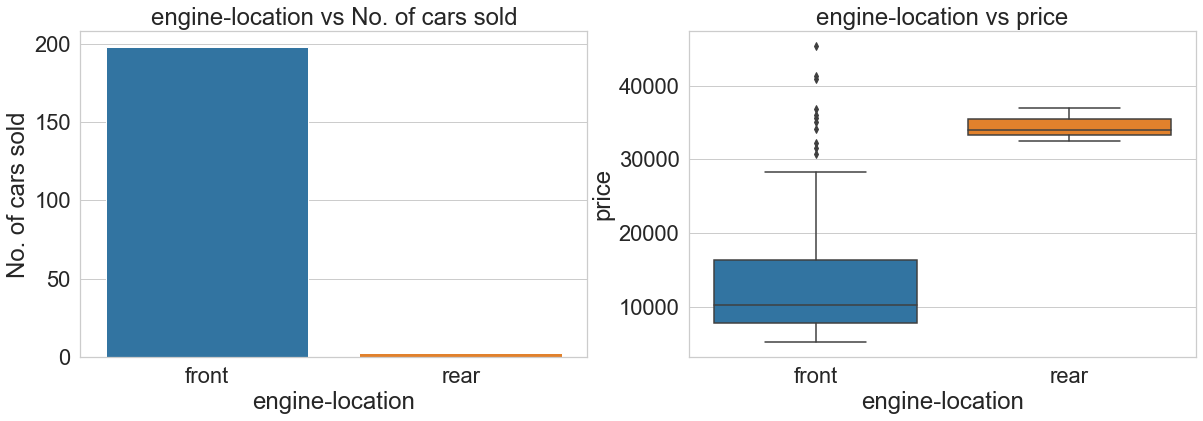

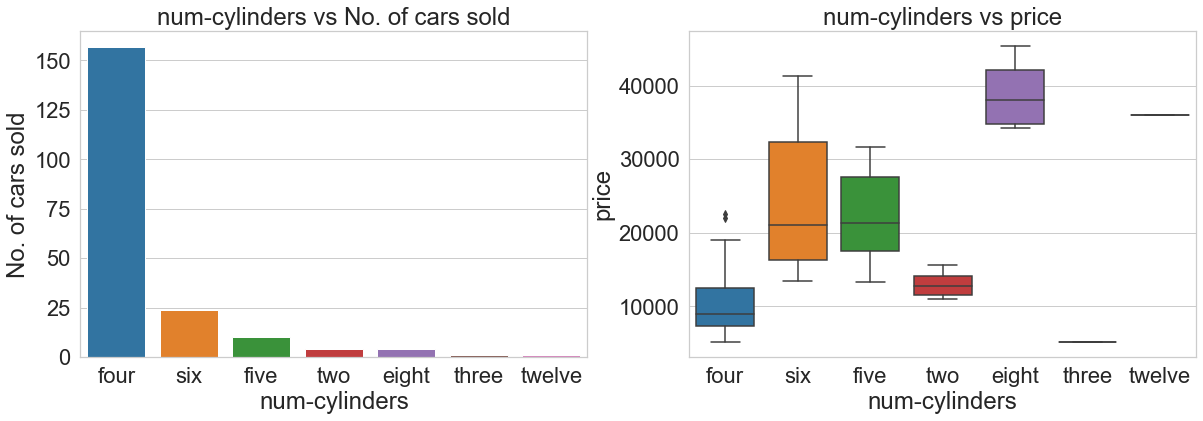

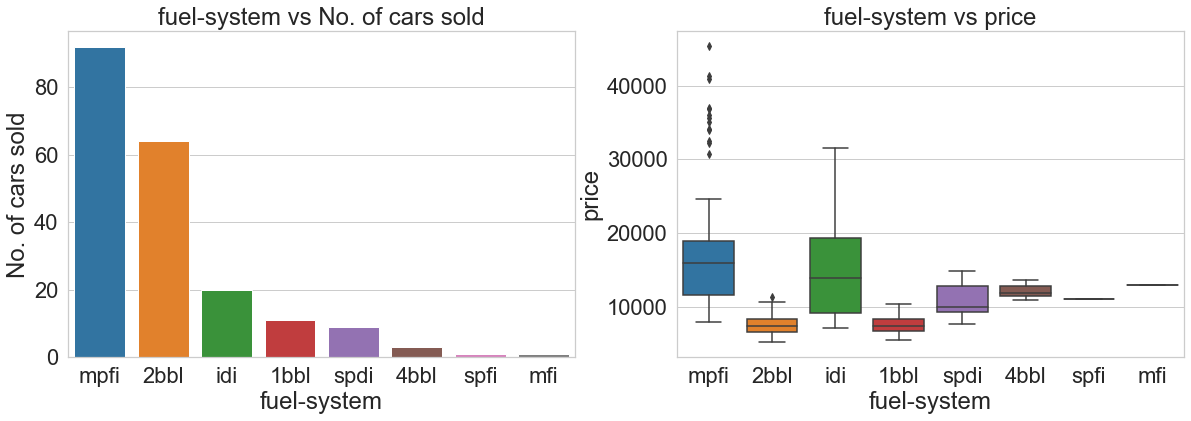

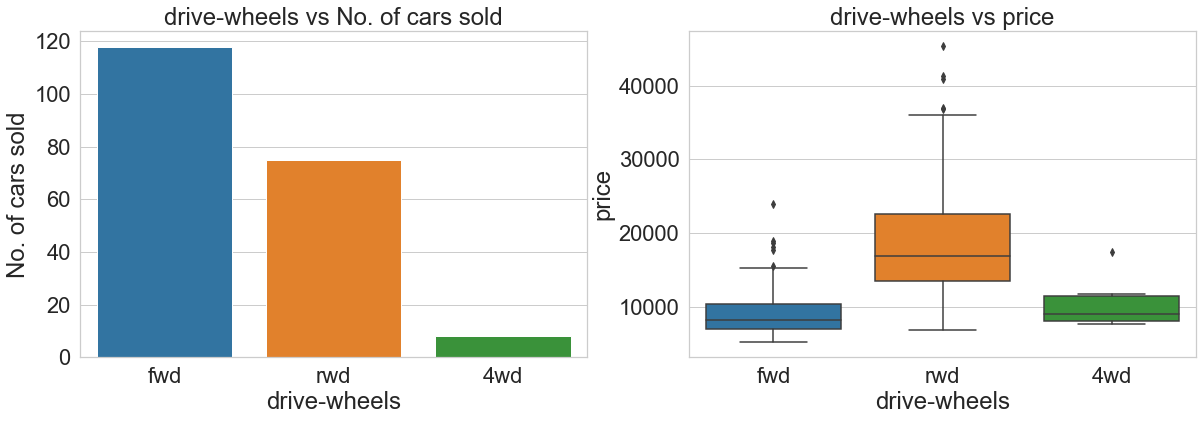

In [15]:
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=2)

## Symboling
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax = sns.countplot(x="symboling", data=data,order = data['symboling'].value_counts().index)
ax.set(ylabel = "No. of cars sold")
ax.set_title("symboling vs No. of cars sold");
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center');

plt.subplot(1,2,2)
ax = sns.boxplot(x="symboling", y = "price",data=data,order= data['symboling'].value_counts().index)
ax.set_title("symboling vs price");
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center');
print("Average Price : {} Dollars".format(data.price.mean()))


## engine-type
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax = sns.countplot(x="engine-type", data=data,order = data['engine-type'].value_counts().index)
ax.set_title("engine-type vs No. of cars sold");
ax.set(ylabel = "No. of cars sold")
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center');

plt.subplot(1,2,2)
ax = sns.boxplot(x="engine-type", y = "price",data=data,order= data['engine-type'].value_counts().index)
ax.set_title("engine-type vs price");
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center');

## Fuel-type
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax = sns.countplot(x="fuel-type", data=data,order = data['fuel-type'].value_counts().index)
ax.set_title("fuel-type vs No. of cars sold");
ax.set(ylabel = "No. of cars sold")
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center');

plt.subplot(1,2,2)
ax = sns.boxplot(x="fuel-type", y = "price",data=data,order= data['fuel-type'].value_counts().index)
ax.set_title("fuel-type vs price");
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center');

## body-style
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax = sns.countplot(x="body-style", data=data,order = data['body-style'].value_counts().index)
ax.set_title("body-style vs No. of cars sold");
ax.set(ylabel = "No. of cars sold")
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center');

plt.subplot(1,2,2)
ax = sns.boxplot(x="body-style", y = "price",data=data,order= data['body-style'].value_counts().index)
ax.set_title("body-style vs price");
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center');

## num-doors
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax = sns.countplot(x="num-doors", data=data,order = data['num-doors'].value_counts().index)
ax.set_title("num-doors vs No. of cars sold");
ax.set(ylabel = "No. of cars sold")
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center');

plt.subplot(1,2,2)
ax = sns.boxplot(x="num-doors", y = "price",data=data,order= data['num-doors'].value_counts().index)
ax.set_title("num-doors vs price");
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center');

## aspiration
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax = sns.countplot(x="aspiration", data=data,order = data['aspiration'].value_counts().index)
ax.set_title("aspiration vs No. of cars sold");
ax.set(ylabel = "No. of cars sold")
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center');

plt.subplot(1,2,2)
ax = sns.boxplot(x="aspiration", y = "price",data=data,order= data['aspiration'].value_counts().index)
ax.set_title("aspiration vs price");
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center');

## engine-location
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax = sns.countplot(x="engine-location", data=data,order = data['engine-location'].value_counts().index)
ax.set_title("engine-location vs No. of cars sold");
ax.set(ylabel = "No. of cars sold")
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center');

plt.subplot(1,2,2)
ax = sns.boxplot(x="engine-location", y = "price",data=data,order= data['engine-location'].value_counts().index)
ax.set_title("engine-location vs price");
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center');

## num-cylinders
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax = sns.countplot(x="num-cylinders", data=data,order = data['num-cylinders'].value_counts().index)
ax.set_title("num-cylinders vs No. of cars sold");
ax.set(ylabel = "No. of cars sold")
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center');

plt.subplot(1,2,2)
ax = sns.boxplot(x="num-cylinders", y = "price",data=data,order= data['num-cylinders'].value_counts().index)
ax.set_title("num-cylinders vs price");
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center');

## fuel-system
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax = sns.countplot(x="fuel-system", data=data,order = data['fuel-system'].value_counts().index)
ax.set_title("fuel-system vs No. of cars sold");
ax.set(ylabel = "No. of cars sold")
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center');

plt.subplot(1,2,2)
ax = sns.boxplot(x="fuel-system", y = "price",data=data,order= data['fuel-system'].value_counts().index)
ax.set_title("fuel-system vs price");
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center');

## drive-wheels
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax = sns.countplot(x="drive-wheels", data=data,order = data['drive-wheels'].value_counts().index)
ax.set_title("drive-wheels vs No. of cars sold");
ax.set(ylabel = "No. of cars sold")
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center');

plt.subplot(1,2,2)
ax = sns.boxplot(x="drive-wheels", y = "price",data=data,order= data['drive-wheels'].value_counts().index)
ax.set_title("drive-wheels vs price");
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='center');

### Observations :
1. Most of the cars are sold with symboling '0' and '1'
2. And from price point it shows that '-1' symboling cars are expensive because risk rating is good.
3. Need to figure out why there is hike in price for symboling '2' and '3' ratings 
4. Gas type cars have more sales than diesel. As gas type cars prices are cheaper.
5. Cars with Ohc type engines have huge sales than other engine types and also cars equipped with Ohc type engines prices are low. Prices of the cars equipped with Ohcv type engine are high.
6. Cars with mpfi fuel systems have more sales eventhough the price is competitive.
7. Front wheel drive cars are more popular than rear wheel drive and 4 wheel drive. FWD prices are low RWD prices are high and 4WD prices are moderate.
8. Sedan type cars attracted most of the customers. 
9. Prices of the turbo cars are higher than standard cars.
10. Engines placed in the rear are expensive than the cars equipped with engines in the front.
11. Cars with 4 cylinders have highest number of sales and 6 and 5 cylinder cars have moderate sales. 12 cylinder cars are expensive and least preferred. 12 cylinder column can be removed for price estimation.

In [16]:
def avg_price(x,y) :
    AA = y.groupby([x])['price'].mean().sort_values(ascending = False)
    A = []
    for i in AA:
        A.append(i)
    dt = pd.DataFrame({"Avg.price" : A,x : pd.Series(AA.index)},index = range(0,len(AA)))
    return dt

<Figure size 1440x432 with 0 Axes>

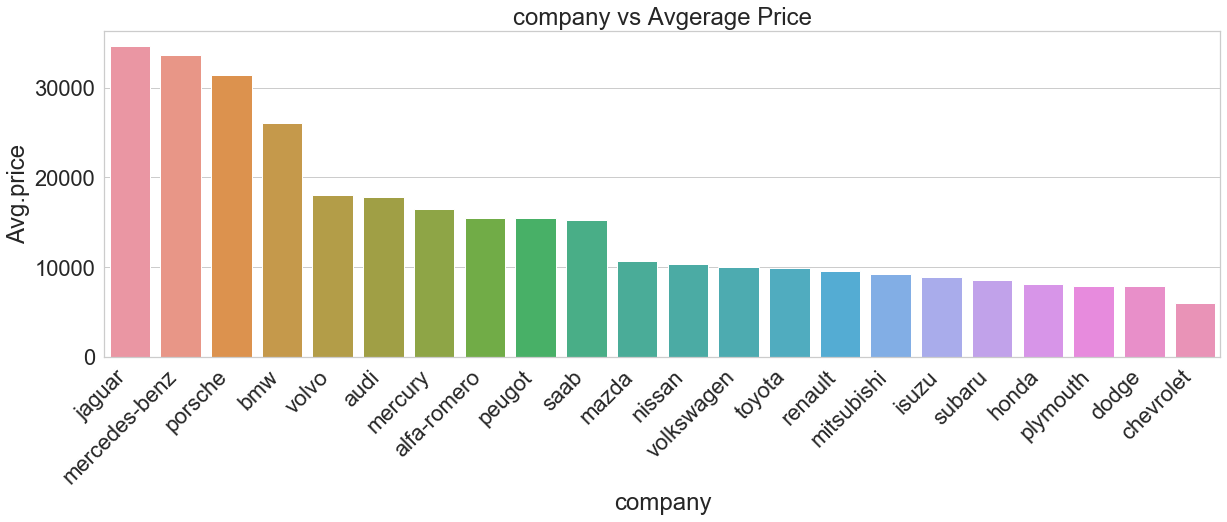

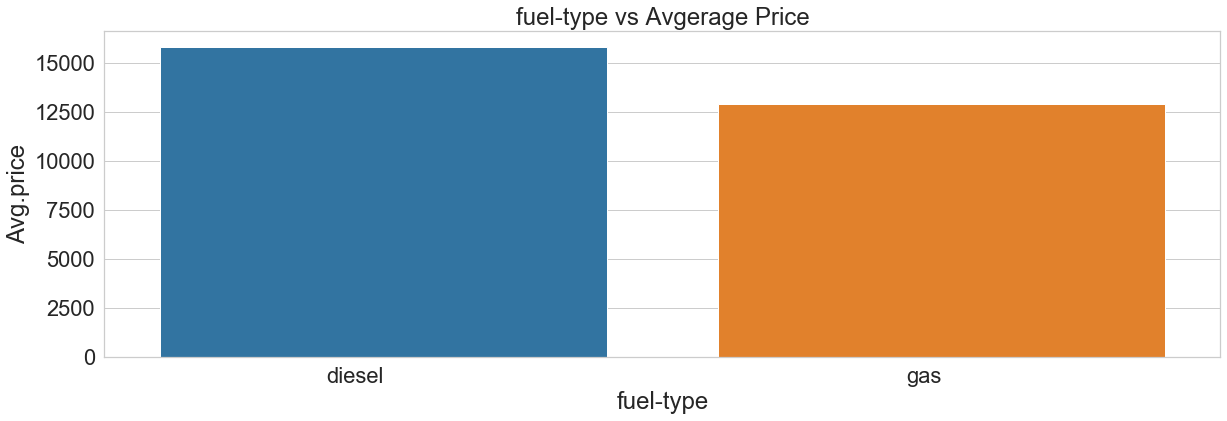

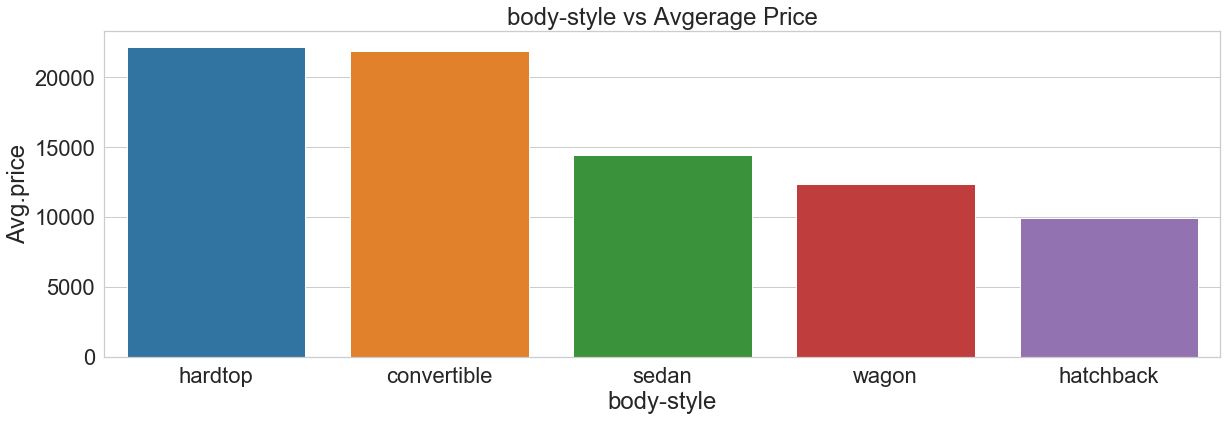

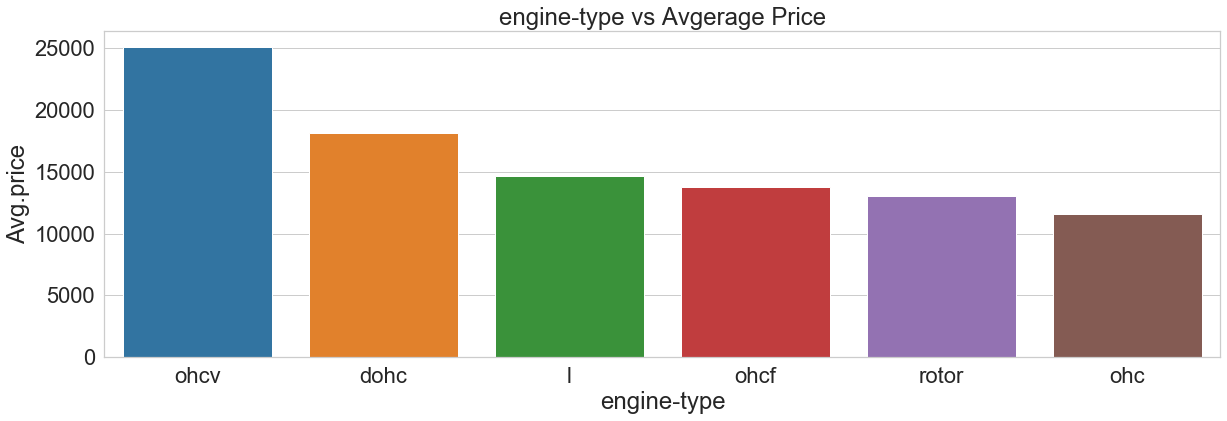

In [17]:
plt.figure(figsize = (20,6))
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=2)

fig, ax1 = plt.subplots(figsize=(20,6))
ax1 = sns.barplot(x = "company",y = "Avg.price",data = avg_price("company",data))
ax1.set_title("company vs Avgerage Price");
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right');

fig, ax1 = plt.subplots(figsize=(20,6))
ax1 = sns.barplot(x = "fuel-type",y = "Avg.price",data = avg_price("fuel-type",data))
ax1.set_title("fuel-type vs Avgerage Price");
ax1.set_xticklabels(ax1.get_xticklabels(), horizontalalignment='right');

fig, ax1 = plt.subplots(figsize=(20,6))
ax1 = sns.barplot(x = "body-style",y = "Avg.price",data = avg_price("body-style",data))
ax1.set_title("body-style vs Avgerage Price");
ax1.set_xticklabels(ax1.get_xticklabels(), horizontalalignment='center');

fig, ax1 = plt.subplots(figsize=(20,6))
ax1 = sns.barplot(x = "engine-type",y = "Avg.price",data = avg_price("engine-type",data))
ax1.set_title("engine-type vs Avgerage Price");
ax1.set_xticklabels(ax1.get_xticklabels(), horizontalalignment='center');

In [18]:
avg_price("body-style",data)

,Avg.price,body-style
0,22208.500000,hardtop
1,21890.500000,convertible
2,14459.755319,sedan
3,12371.960000,wagon
4,9957.441176,hatchback


#### Observations :
        1. Jaguar and Mercedes Benz have higher average prices.
        2. Diesel cars average prices are little higher than the gas cars.
        3. Hartop and convertible cars have higher prices and hatchback cars prices are lesser.
        4. Ohcv engine type have high average price than others.

### Exploring Numerical Data

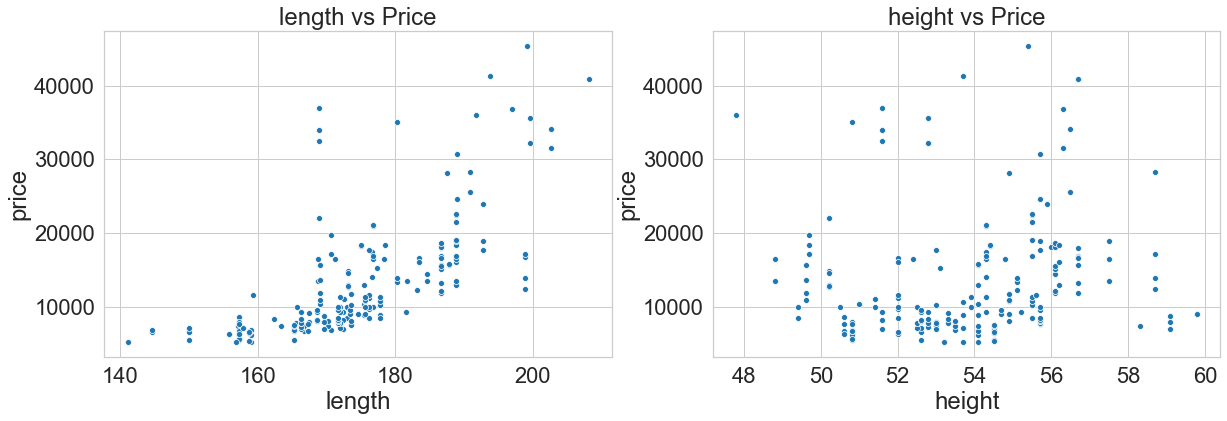

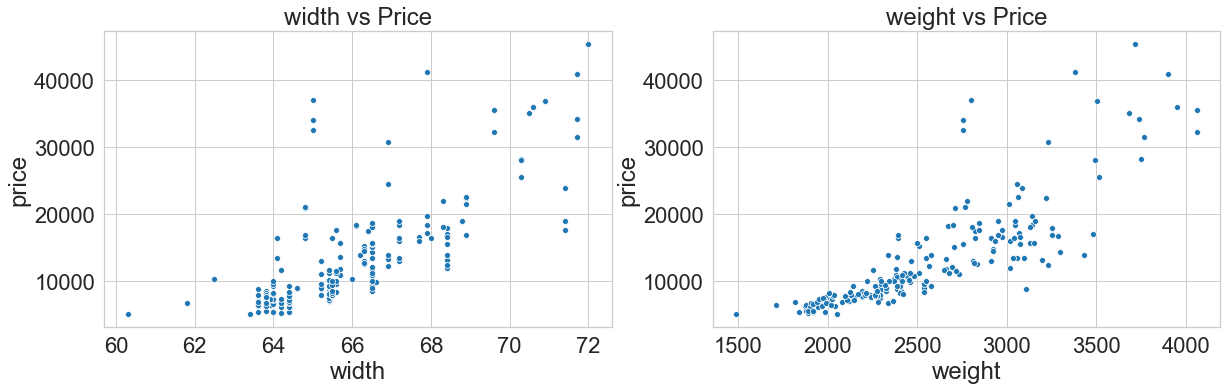

In [19]:
plt.figure(figsize = (20,6))
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=2)

plt.subplot(1,2,1)
sns.scatterplot(x =data.length,y = data.price )
plt.title('length vs Price');

plt.subplot(1,2,2)
sns.scatterplot(x =data.height,y = data.price )
plt.title('height vs Price');

plt.figure(figsize = (20,12))
plt.subplot(2,2,1)
sns.scatterplot(x =data.width,y = data.price )
plt.title('width vs Price');

plt.subplot(2,2,2)
sns.scatterplot(x =data.weight,y = data.price )
plt.title('weight vs Price');


#### Observation :
    1. length,width and weight of the cars are showing increasing trend with price i.e: positive correlation.
    2. Height is not significant to estimate the price, further we can remove the column.
    3. length and width are highly correlated.

In [20]:
rel = ['length','weight','width','height']
data[rel].corr(method ='pearson') 

,length,weight,width,height
length,1.000000,0.880665,0.857170,0.492063
weight,0.880665,1.000000,0.866201,0.307581
width,0.857170,0.866201,1.000000,0.306002
height,0.492063,0.307581,0.306002,1.000000


In [21]:
def pairplot(x,y,data,target):
    plt.figure(figsize = (20,6))
    sns.set_style("whitegrid")
    sns.set_context("notebook",font_scale=2)
    sns.pairplot(data,x_vars=[x,y],y_vars=target,size = 6,aspect=1, kind='scatter')
    plt.show()

C:\Users\Simhachala avinash\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x432 with 0 Axes>

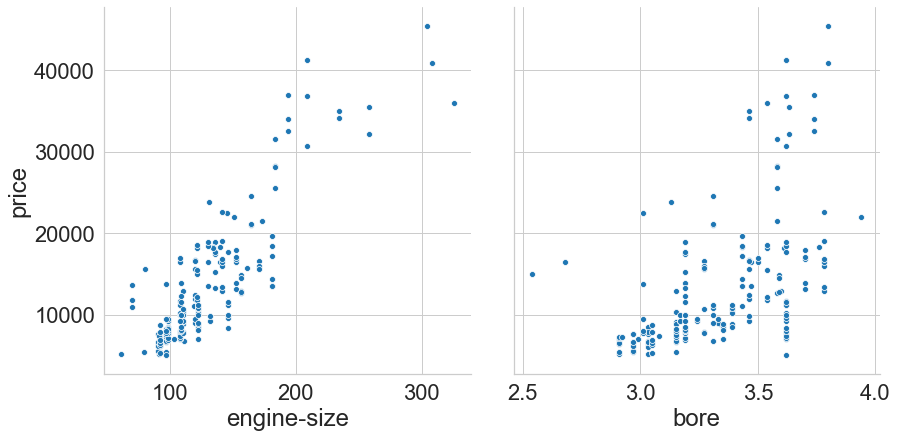

<Figure size 1440x432 with 0 Axes>

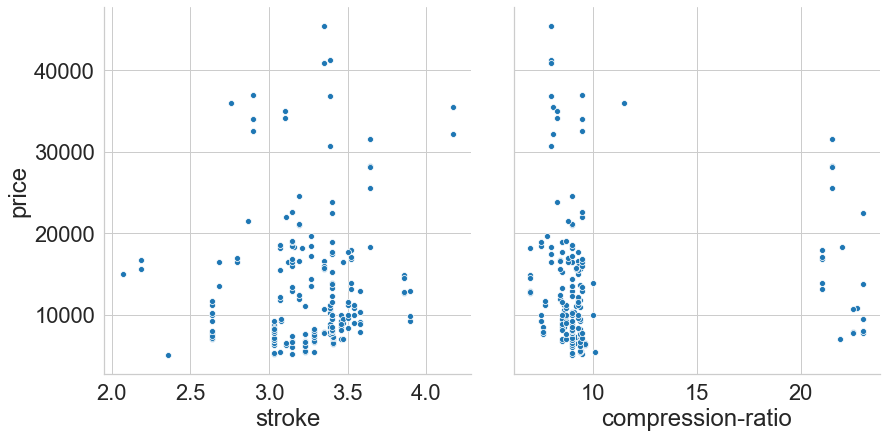

<Figure size 1440x432 with 0 Axes>

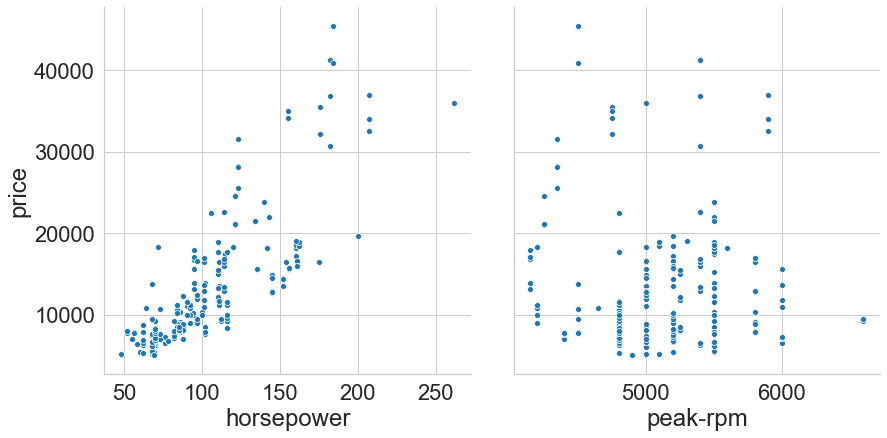

<Figure size 1440x432 with 0 Axes>

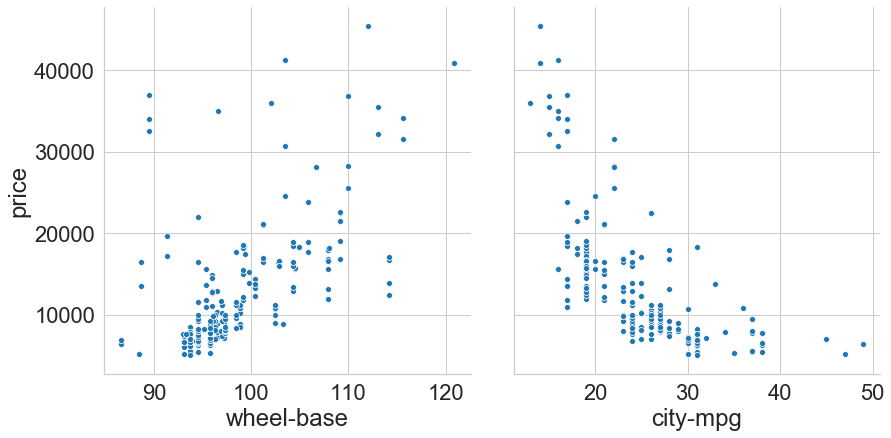

<Figure size 1440x432 with 0 Axes>

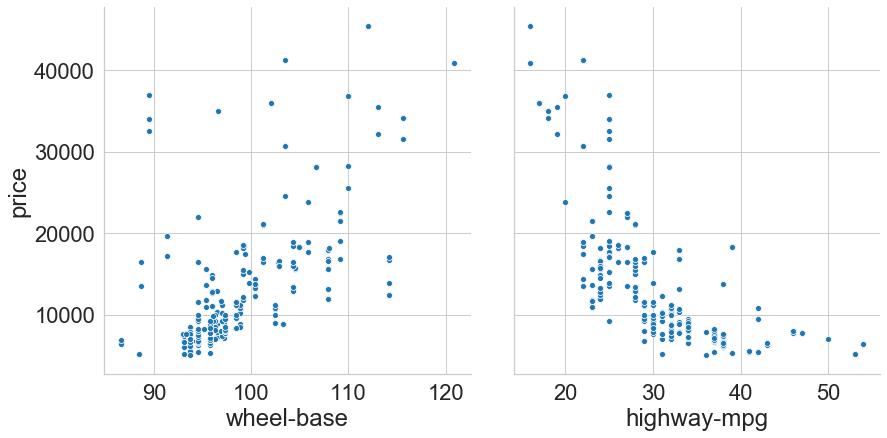

<Figure size 1440x432 with 0 Axes>

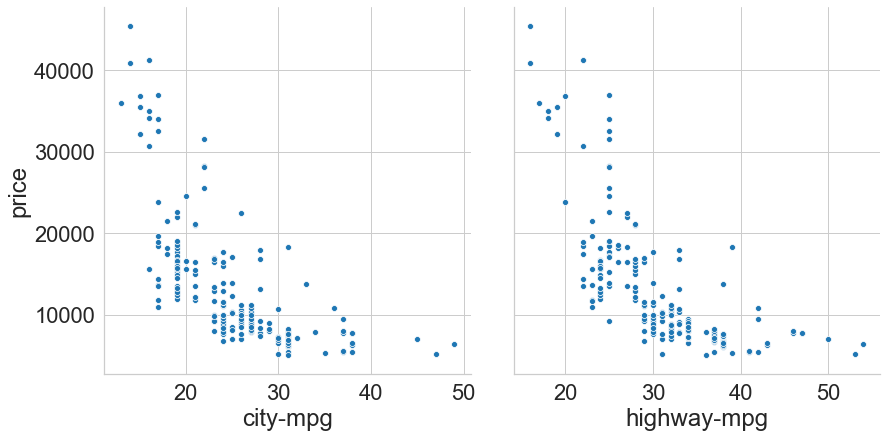

In [22]:
pairplot('engine-size', 'bore',data,'price');
pairplot('stroke', 'compression-ratio',data,'price');
pairplot('horsepower', 'peak-rpm',data,'price');
pairplot('wheel-base', 'city-mpg',data,'price');
pairplot('wheel-base', 'highway-mpg',data,'price');
pairplot('city-mpg', 'highway-mpg',data,'price');

#### Observations:
1. Horsepower, engine-size, bore and wheel base are having positive correlation to price.
2. City-MPG and highway-MPG are negatively correlated i.e., price decreases with increase in MPG.
3. City-MPG and highway-MPG are highly correlated with each other. So, we can use them to derive a new feature for overall MPG.

#### Feature Engineering
    Deriving overall_mpg feature from city-mpg and highway-mpg

In [23]:
data['overall_mpg'] = (0.54*data['city-mpg'])+(0.45*data['highway-mpg'])

##### Binning the cars as low-end,budget,Luxury with respective to price range

In [24]:
bins = [0,10000,20000,max(data.price)]
labels = ["low-end","budget","Luxury"]
data['class'] = pd.cut(data['price'],bins=bins,labels = labels)
data.head(10)

,symboling,normalized-losses,company,fuel-type,aspiration,num-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,overall_mpg,class
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,23.49,budget
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,23.49,budget
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,21.96,budget
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,26.46,budget
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,19.62,budget
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,21.51,budget
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0,21.51,budget
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0,21.51,budget
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0,18.18,Luxury
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0,25.47,budget


### Bivariate analysis

###### 1. Overall_mpg vs Price

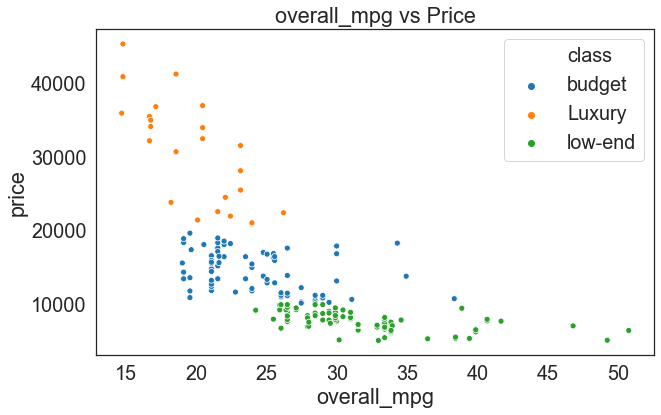

In [25]:
plt.figure(figsize = (10,6))
sns.set_style("white")
sns.set_context("notebook",font_scale=1.8)

ax1 = sns.scatterplot(x = data.overall_mpg,y = data.price,hue = data['class'])
ax1.set_title("overall_mpg vs Price");

###### Observation :
    1. Overall mpg is significant with price showing that forward wheel drive cars are having better mpg with respect to previous observation.
    2. Rear wheel drive cars are bit expensive and have low mpg.

###### 2. Class  vs HorsePower 

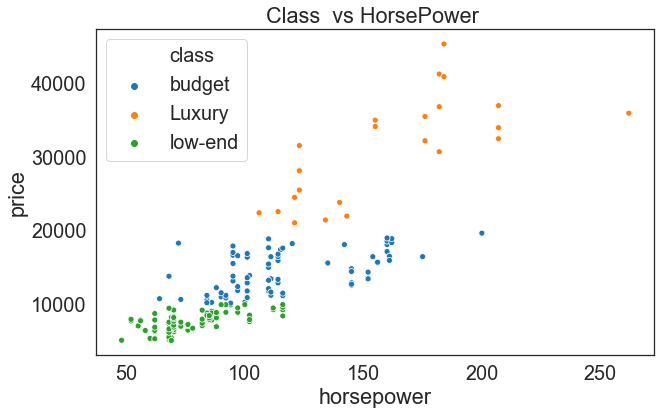

In [26]:
plt.figure(figsize = (10,6))
sns.set_style("white")
sns.set_context("notebook",font_scale=1.8)

ax1 = sns.scatterplot(x = data.horsepower,y = data.price,hue = data['class'])
ax1.set_title("Class  vs HorsePower ");

###### Observation :
1. Luxury cars have more horse power compared to low-end and budget cars.

###### 3. Overall_mpg  vs Fuel-Type 

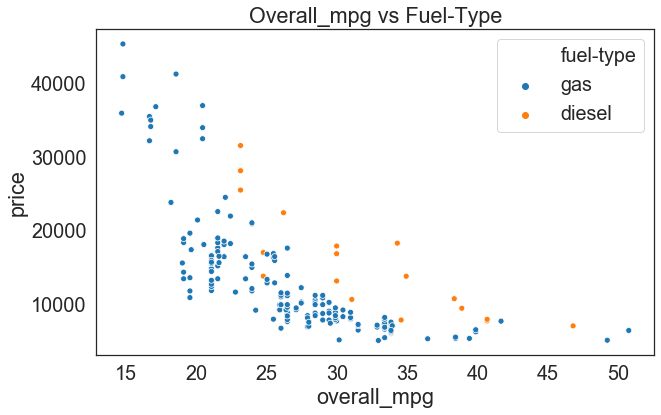

In [27]:
plt.figure(figsize = (10,6))
sns.set_style("white")
sns.set_context("notebook",font_scale=1.8)

ax1 = sns.scatterplot(x = data.overall_mpg,y = data['price'],hue = data['fuel-type'])
ax1.set_title("Overall_mpg vs Fuel-Type");

###### Observation :
1. For same MPG, gas cars cheaper than the diesel cars.

###### 4. Horse Power  vs Fuel-Type 

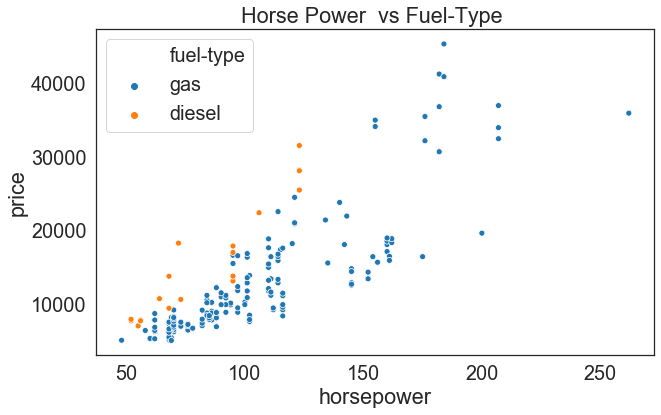

In [28]:
plt.figure(figsize = (10,6))
sns.set_style("white")
sns.set_context("notebook",font_scale=1.8)

ax1 = sns.scatterplot(x = data.horsepower,y = data['price'],hue = data['fuel-type'])
ax1.set_title("Horse Power  vs Fuel-Type ");

###### Observation :
1. For same Horse Power, gas type cars are cheaper than the diesel cars.

### Significant Features after Visualization of data :

1.  class
2.  fuel-type
3.  aspiration
4.  engine-type
5.  horsepower
6.  num-cylinders
7.  drive-wheels
8.  weight
9.  length
10. width
11. engine-size
12. bore
13. wheel-base
14. overall_mpg
15. body-style

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          201 non-null    object  
 1   normalized-losses  164 non-null    float64 
 2   company            201 non-null    object  
 3   fuel-type          201 non-null    object  
 4   aspiration         201 non-null    object  
 5   num-doors          199 non-null    object  
 6   body-style         201 non-null    object  
 7   drive-wheels       201 non-null    object  
 8   engine-location    201 non-null    object  
 9   wheel-base         201 non-null    float64 
 10  length             201 non-null    float64 
 11  width              201 non-null    float64 
 12  height             201 non-null    float64 
 13  weight             201 non-null    int64   
 14  engine-type        201 non-null    object  
 15  num-cylinders      201 non-null    object  
 16  engine-s

In [30]:
data['class'] = data['class'].astype('O')

In [31]:
cars_data = data[["price","class","fuel-type","aspiration","engine-type","horsepower",
                  "num-cylinders","drive-wheels","weight","length","width","engine-size",
                  "bore","wheel-base","overall_mpg","body-style"]]
cars_data.head()

,price,class,fuel-type,aspiration,engine-type,horsepower,num-cylinders,drive-wheels,weight,length,width,engine-size,bore,wheel-base,overall_mpg,body-style
0,13495.0,budget,gas,std,dohc,111.0,four,rwd,2548,168.8,64.1,130,3.47,88.6,23.49,convertible
1,16500.0,budget,gas,std,dohc,111.0,four,rwd,2548,168.8,64.1,130,3.47,88.6,23.49,convertible
2,16500.0,budget,gas,std,ohcv,154.0,six,rwd,2823,171.2,65.5,152,2.68,94.5,21.96,hatchback
3,13950.0,budget,gas,std,ohc,102.0,four,fwd,2337,176.6,66.2,109,3.19,99.8,26.46,sedan
4,17450.0,budget,gas,std,ohc,115.0,five,4wd,2824,176.6,66.4,136,3.19,99.4,19.62,sedan


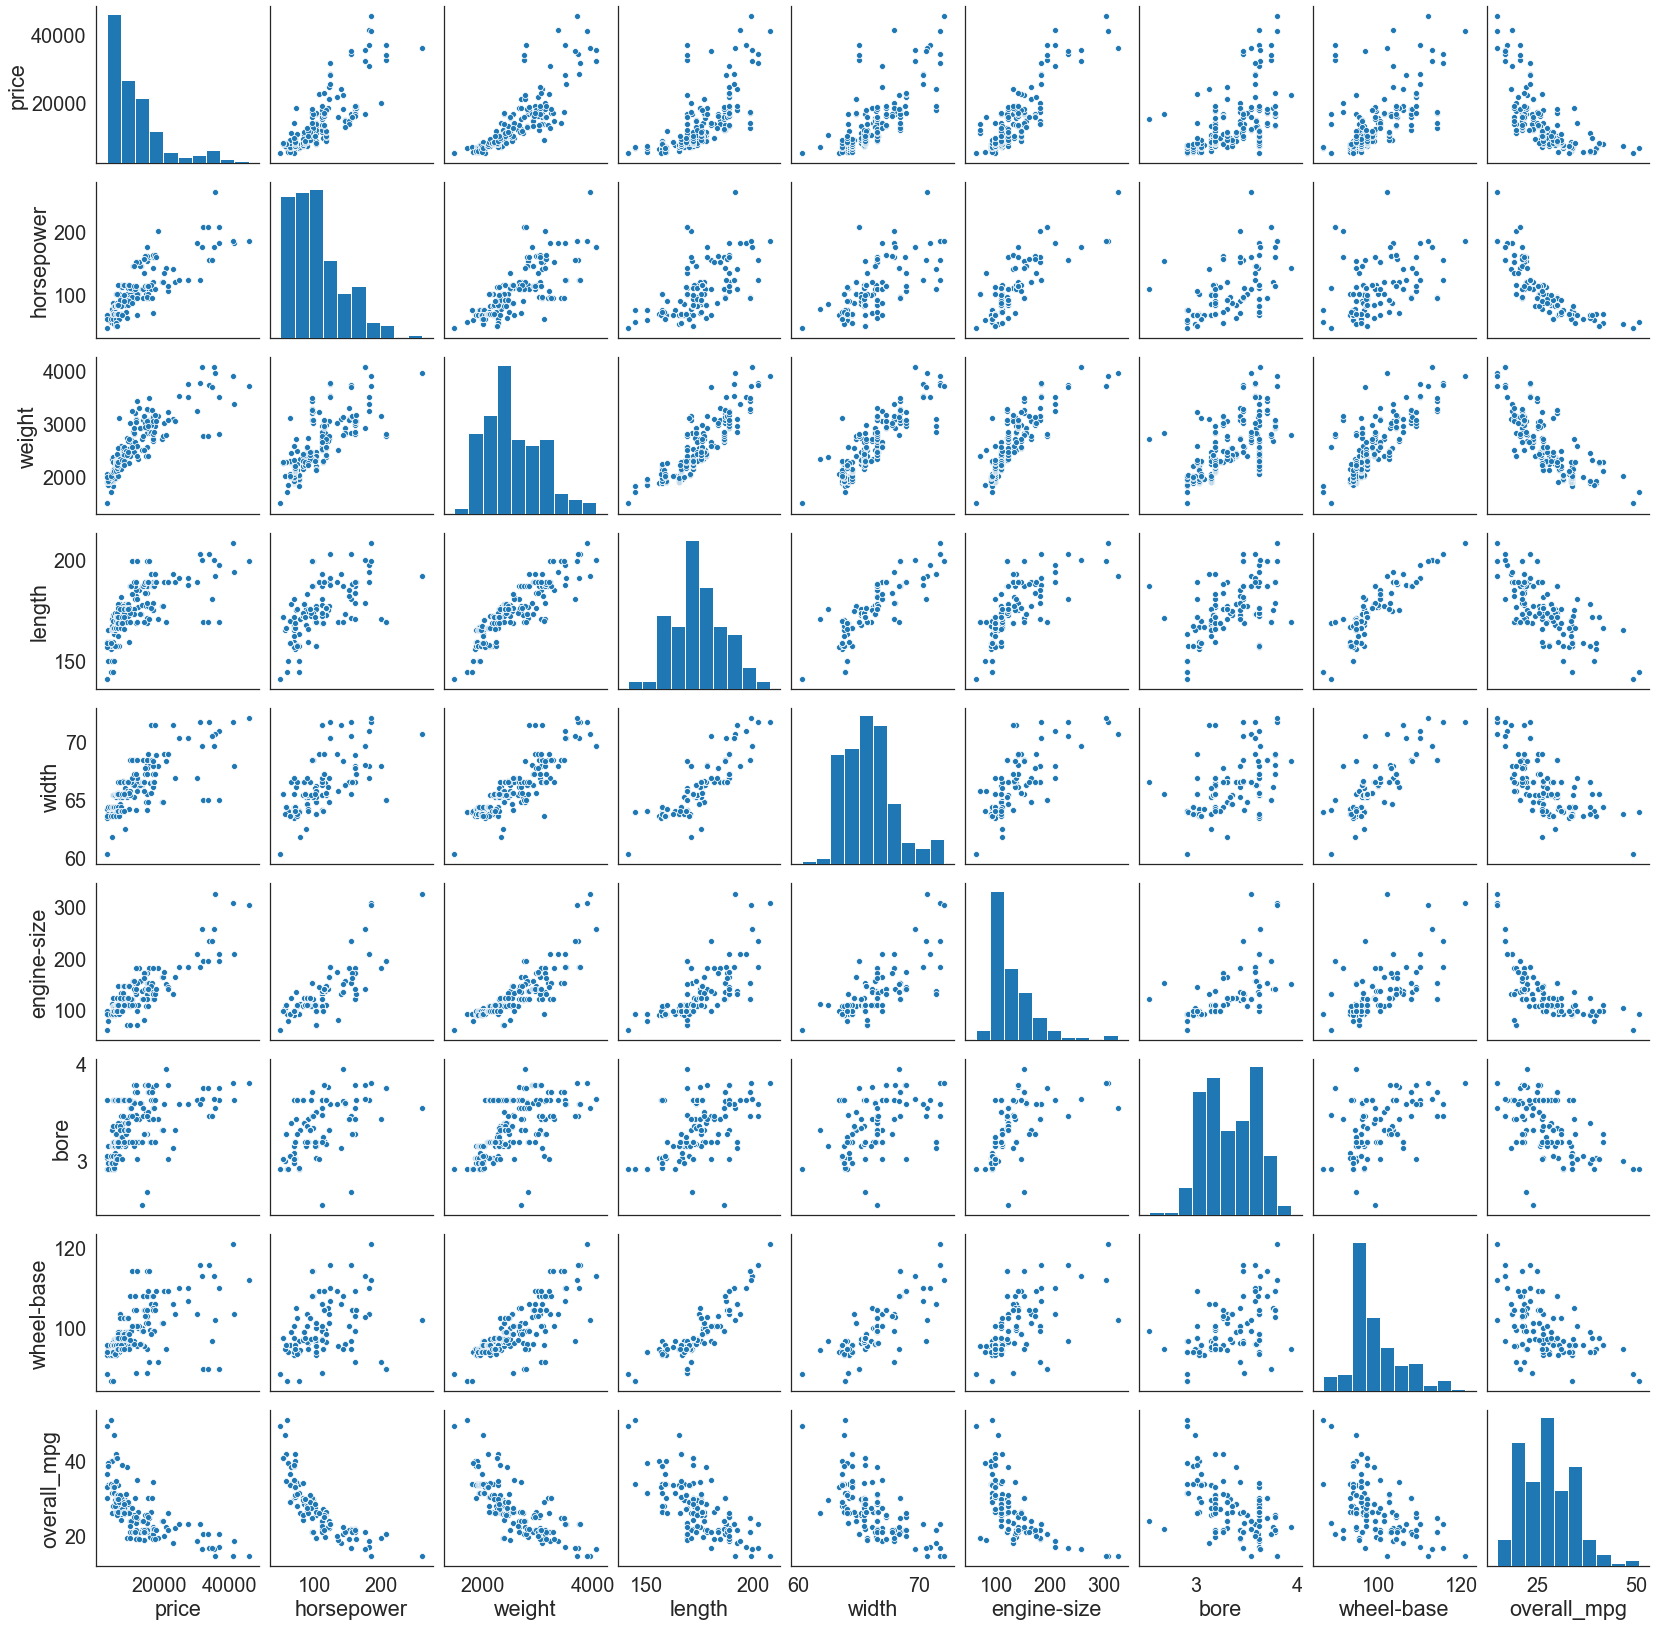

In [32]:
sns.pairplot(cars_data)
plt.show()

In [33]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          201 non-null    float64
 1   class          201 non-null    object 
 2   fuel-type      201 non-null    object 
 3   aspiration     201 non-null    object 
 4   engine-type    201 non-null    object 
 5   horsepower     199 non-null    float64
 6   num-cylinders  201 non-null    object 
 7   drive-wheels   201 non-null    object 
 8   weight         201 non-null    int64  
 9   length         201 non-null    float64
 10  width          201 non-null    float64
 11  engine-size    201 non-null    int64  
 12  bore           197 non-null    float64
 13  wheel-base     201 non-null    float64
 14  overall_mpg    201 non-null    float64
 15  body-style     201 non-null    object 
dtypes: float64(7), int64(2), object(7)
memory usage: 36.7+ KB


#### Checking for null values

In [34]:
print("Name and datatype of all attributes with no. of missing value in data : ")
null_values = pd.DataFrame({'total_missing': cars_data.isnull().sum(), '%_missing': cars_data.isnull().mean()*100,
                           'datatype':cars_data.dtypes})
null_values[null_values['total_missing']>0].sort_values('total_missing',ascending=False)

Name and datatype of all attributes with no. of missing value in data : 


,total_missing,%_missing,datatype
bore,4,1.990050,float64
horsepower,2,0.995025,float64


In [35]:
car_data = cars_data.drop('price',axis=1)

##### Separating categorical and numerical attributes

In [36]:
## Categorical Variables
cat = [i for i in cars_data.columns if cars_data[i].dtype =='O']

## Numerical Variables
num = [i for i in cars_data.columns if cars_data[i].dtype!='O']

##### Imputing Numerical attributes with mean

In [37]:
cars_data = cars_data.fillna(car_data.mean())

In [38]:
print("Name and datatype of all attributes with no. of missing value in data : ")
null_values = pd.DataFrame({'total_missing': cars_data.isnull().sum(), '%_missing': cars_data.isnull().mean()*100,
                           'datatype':cars_data.dtypes})
null_values[null_values['total_missing']>0].sort_values('total_missing',ascending=False)

Name and datatype of all attributes with no. of missing value in data : 


,total_missing,%_missing,datatype


###### Dummification of categorical variables

In [39]:
cars_data = pd.get_dummies(cars_data,columns=cat,drop_first = True)

In [40]:
cars_data.head()

,price,horsepower,weight,length,width,engine-size,bore,wheel-base,overall_mpg,class_budget,...,num-cylinders_six,num-cylinders_three,num-cylinders_twelve,num-cylinders_two,drive-wheels_fwd,drive-wheels_rwd,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,13495.0,111.0,2548,168.8,64.1,130,3.47,88.6,23.49,1,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,111.0,2548,168.8,64.1,130,3.47,88.6,23.49,1,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,154.0,2823,171.2,65.5,152,2.68,94.5,21.96,1,...,1,0,0,0,0,1,0,1,0,0
3,13950.0,102.0,2337,176.6,66.2,109,3.19,99.8,26.46,1,...,0,0,0,0,1,0,0,0,1,0
4,17450.0,115.0,2824,176.6,66.4,136,3.19,99.4,19.62,1,...,0,0,0,0,0,0,0,0,1,0


In [41]:
cars_data.shape

(201, 30)

In [42]:
cars_data.columns

Index(['price', 'horsepower', 'weight', 'length', 'width', 'engine-size',
       'bore', 'wheel-base', 'overall_mpg', 'class_budget', 'class_low-end',
       'fuel-type_gas', 'aspiration_turbo', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor',
       'num-cylinders_five', 'num-cylinders_four', 'num-cylinders_six',
       'num-cylinders_three', 'num-cylinders_twelve', 'num-cylinders_two',
       'drive-wheels_fwd', 'drive-wheels_rwd', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon'],
      dtype='object')

#### Spliting the data into Train and Test

In [43]:
train,test = train_test_split(cars_data,test_size=0.3,random_state=0)

##### Scaling the data

In [44]:
scaler = MinMaxScaler()

train[num] = scaler.fit_transform(train[num])

C:\Users\Simhachala avinash\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Simhachala avinash\Anaconda3\lib\site-packages\pandas\core\indexing.py:964: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [45]:
train.head()

,price,horsepower,weight,length,width,engine-size,bore,wheel-base,overall_mpg,class_budget,...,num-cylinders_six,num-cylinders_three,num-cylinders_twelve,num-cylinders_two,drive-wheels_fwd,drive-wheels_rwd,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
99,0.105022,0.228972,0.339561,0.482090,0.429825,0.222642,0.580357,0.309038,0.421446,0,...,0,0,0,0,1,0,0,1,0,0
185,0.084172,0.172897,0.294070,0.456716,0.456140,0.181132,0.455357,0.311953,0.421446,0,...,0,0,0,0,1,0,0,0,1,0
20,0.039376,0.102804,0.170999,0.264179,0.289474,0.109434,0.312500,0.230321,0.698254,0,...,0,0,0,0,1,0,0,0,1,0
157,0.056603,0.102804,0.252234,0.376119,0.359649,0.139623,0.455357,0.265306,0.503741,0,...,0,0,0,0,1,0,0,1,0,0
95,0.073222,0.098131,0.219334,0.365672,0.307018,0.135849,0.419643,0.230321,0.518703,0,...,0,0,0,0,1,0,0,1,0,0


In [46]:
train.describe()

,price,horsepower,weight,length,width,engine-size,bore,wheel-base,overall_mpg,class_budget,...,num-cylinders_six,num-cylinders_three,num-cylinders_twelve,num-cylinders_two,drive-wheels_fwd,drive-wheels_rwd,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.205941,0.257169,0.425572,0.490906,0.484336,0.242938,0.586493,0.353707,0.356181,0.385714,...,0.107143,0.007143,0.007143,0.021429,0.571429,0.392857,0.028571,0.371429,0.471429,0.107143
std,0.199470,0.169126,0.207686,0.177894,0.182062,0.150428,0.232856,0.171172,0.182200,0.488511,...,0.310405,0.084515,0.084515,0.145328,0.496649,0.490139,0.167197,0.484922,0.500975,0.310405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067968,0.102804,0.259342,0.376119,0.324561,0.135849,0.419643,0.230321,0.201995,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.133641,0.224299,0.373071,0.479104,0.451754,0.220755,0.580992,0.290087,0.326683,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.312369,0.317757,0.589460,0.632836,0.578947,0.301887,0.803571,0.460641,0.466334,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


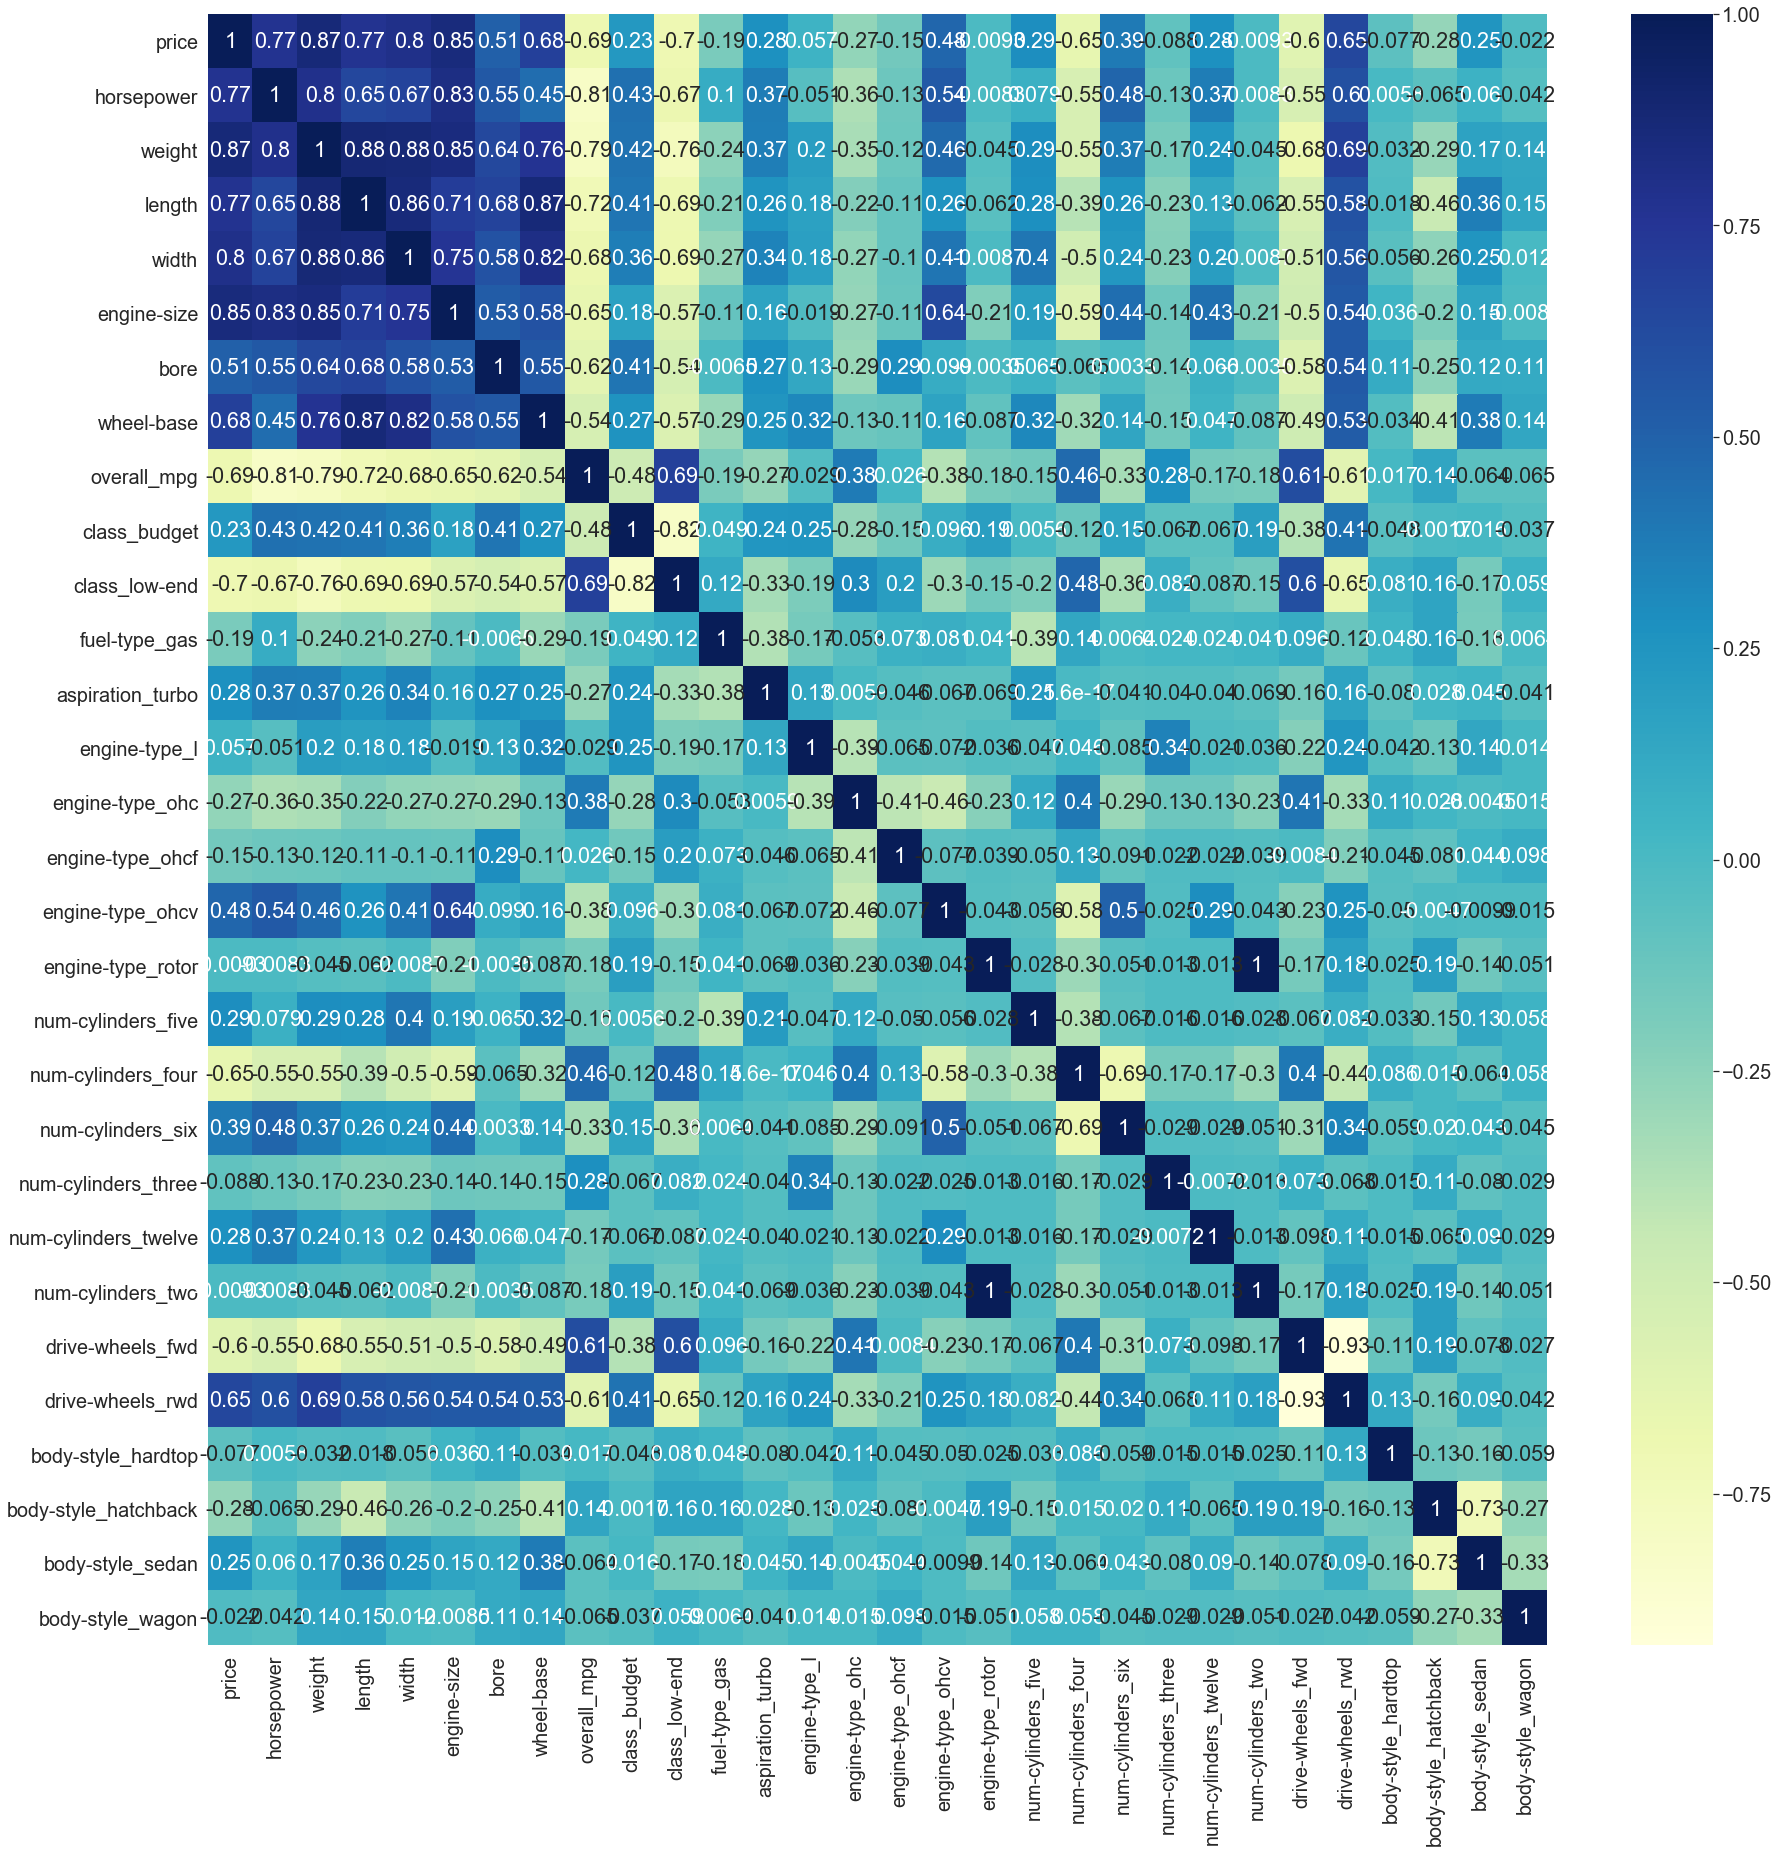

In [47]:
plt.figure(figsize = (30, 30))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [48]:
y_train = train.pop('price')
x_train = train

## Model Building

### Linear Regression

In [67]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
rfe = RFE(reg,10)
rfe = rfe.fit(x_train,y_train)

In [51]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('horsepower', True, 1),
 ('weight', True, 1),
 ('length', False, 13),
 ('width', False, 14),
 ('engine-size', False, 9),
 ('bore', False, 20),
 ('wheel-base', False, 2),
 ('overall_mpg', False, 3),
 ('class_budget', True, 1),
 ('class_low-end', True, 1),
 ('fuel-type_gas', False, 11),
 ('aspiration_turbo', False, 10),
 ('engine-type_l', False, 12),
 ('engine-type_ohc', False, 16),
 ('engine-type_ohcf', False, 15),
 ('engine-type_ohcv', False, 19),
 ('engine-type_rotor', False, 8),
 ('num-cylinders_five', True, 1),
 ('num-cylinders_four', True, 1),
 ('num-cylinders_six', True, 1),
 ('num-cylinders_three', True, 1),
 ('num-cylinders_twelve', True, 1),
 ('num-cylinders_two', True, 1),
 ('drive-wheels_fwd', False, 17),
 ('drive-wheels_rwd', False, 18),
 ('body-style_hardtop', False, 4),
 ('body-style_hatchback', False, 5),
 ('body-style_sedan', False, 7),
 ('body-style_wagon', False, 6)]

In [52]:
x_train.columns[rfe.support_]

Index(['horsepower', 'weight', 'class_budget', 'class_low-end',
       'num-cylinders_five', 'num-cylinders_four', 'num-cylinders_six',
       'num-cylinders_three', 'num-cylinders_twelve', 'num-cylinders_two'],
      dtype='object')

### Model building using stat models for detailed statistics

In [53]:
rfe_train = x_train[x_train.columns[rfe.support_]]
rfe_train.head()

,horsepower,weight,class_budget,class_low-end,num-cylinders_five,num-cylinders_four,num-cylinders_six,num-cylinders_three,num-cylinders_twelve,num-cylinders_two
99,0.228972,0.339561,0,1,0,1,0,0,0,0
185,0.172897,0.294070,0,1,0,1,0,0,0,0
20,0.102804,0.170999,0,1,0,1,0,0,0,0
157,0.102804,0.252234,0,1,0,1,0,0,0,0
95,0.098131,0.219334,0,1,0,1,0,0,0,0


#### Model building with ordinary least square

In [54]:
def VIF_check(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['vif'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['vif'] = round(vif['vif'],2)
    vif = vif.sort_values(by = "vif",ascending = False)
    return(vif)

def  ols_model(x,y):
    x = sm.add_constant(x)
    reg = sm.OLS(y,x).fit()
    print(reg.summary())
    return x

### Model 1

In [55]:
x_train_1 = ols_model(rfe_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     177.7
Date:                Sun, 17 May 2020   Prob (F-statistic):           2.35e-70
Time:                        21:49:08   Log-Likelihood:                 216.05
No. Observations:                 140   AIC:                            -410.1
Df Residuals:                     129   BIC:                            -377.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5056 

In [56]:
rfe_train_new = rfe_train.drop(["num-cylinders_three"],axis = 1)

In [57]:
x_train_new = ols_model(rfe_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     192.9
Date:                Sun, 17 May 2020   Prob (F-statistic):           1.05e-70
Time:                        21:49:08   Log-Likelihood:                 214.02
No. Observations:                 140   AIC:                            -408.0
Df Residuals:                     130   BIC:                            -378.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4484 

### Checking for VIF

In [58]:
VIF_check(x_train_new)

,variables,vif
0,const,92.42
4,class_low-end,10.17
6,num-cylinders_four,8.02
3,class_budget,5.96
2,weight,5.21
7,num-cylinders_six,4.63
1,horsepower,4.10
5,num-cylinders_five,2.28
9,num-cylinders_two,2.13
8,num-cylinders_twelve,1.48


In [59]:
VIF_check(x_train_1)

,variables,vif
0,const,134.00
6,num-cylinders_four,13.56
4,class_low-end,10.26
7,num-cylinders_six,6.65
3,class_budget,6.33
2,weight,5.58
1,horsepower,4.16
10,num-cylinders_two,2.96
5,num-cylinders_five,2.93
8,num-cylinders_three,1.78


###### Dropping num-cylinders_four,class_low-end because of high VIF  (High value due to multi-collinearity)

In [60]:
x_train_2 = rfe_train.drop(['num-cylinders_four','class_low-end'],axis = 1)

In [61]:
Model_3 = ols_model(x_train_2,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     72.62
Date:                Sun, 17 May 2020   Prob (F-statistic):           1.98e-44
Time:                        21:49:08   Log-Likelihood:                 146.04
No. Observations:                 140   AIC:                            -274.1
Df Residuals:                     131   BIC:                            -247.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1495 

### Residual Analysis of model

In [62]:
reg = sm.OLS(y_train,rfe_train).fit()
y_train_price = reg.predict(rfe_train)

Text(0.5, 0, 'Errors')

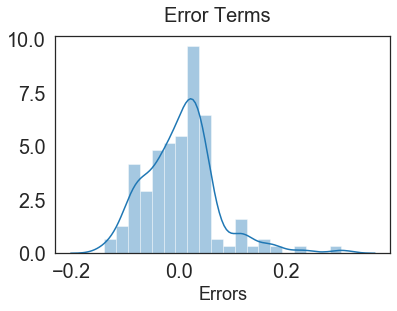

In [63]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

##### Error terms seems to be slightly right skewed

### Prediction and Evaluation

In [64]:
test[num] = scaler.fit_transform(test[num])

C:\Users\Simhachala avinash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Simhachala avinash\Anaconda3\lib\site-packages\pandas\core\indexing.py:964: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [65]:
y_test = test.pop('price')
x_test = test

In [66]:
# model to make predictions.
X_train_new = x_train_new
# new dataframe by dropping variables from X_test
X_test_new = x_test[x_train_new.columns]


KeyError: "['const'] not in index"

In [68]:
y_pred = reg.predict(x_test)

In [69]:
r2_score(y_test, y_pred)

0.6997565944273134